<a href="https://colab.research.google.com/github/hafeezjaan77/Code/blob/hafeezjaan77-patch-1/Aromatase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 1] Download Bioactivity Data (Concised version)**

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 1, we will be performing Data Collection and Pre-Processing from the ChEMBL Database.

    Redundant code cells were deleted.
    Code cells for saving files to Google Drive has been deleted.



ChEMBL Database

The ChEMBL Database is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 80,480 documents, 1.4 million assays and the data spans 14,000 targets and 2,000 cells and 3,000 indications. [Data as of January 15, 2021; ChEMBL version 28].



# **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.


In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 4.7MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.4-cp37-none-any.whl size=55663 sha256=0183bfa2d16a85ce8ff89035e3a9d1bd4ae5f627fd6b0346fc4f8b69131ff174
  Stored in directory: /root/.cache/pip/wheels/98/4c/16/bdb2ef9c937173e56b04d71fc1a6f98f0ff24992ae2e35daf3
Successfully built chembl-webresource-client


**Importing libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client


# **Search for Target protein**

**Target search for Aromatase**


In [ ]:
# Target search for Aromatase
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116



**Select and retrieve bioactivity data for Human Aromatase (first entry)**

We will assign the fifth entry (which corresponds to the target protein, Human Aromatase) to the selected_target variable


In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

Here, we will retrieve only bioactivity data for Human Aromatase (CHEMBL1978) that are reported as pChEMBL values.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...",CHEMBL341591,None,CHEMBL341591,5.15,False,http://www.openphacts.org/units/Nanomolar,267172,=,1,True,=,None,IC50,nM,None,7100.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,None,CHEMBL2111947,None,CHEMBL2111947,None,False,http://www.openphacts.org/units/Nanomolar,267163,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...",CHEMBL431859,None,CHEMBL431859,6.62,False,http://www.openphacts.org/units/Nanomolar,214178,=,1,True,=,None,IC50,nM,None,238.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...",CHEMBL113637,None,CHEMBL113637,7.24,False,http://www.openphacts.org/units/Nanomolar,214179,=,1,True,=,None,IC50,nM,None,57.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...",CHEMBL112021,None,CHEMBL112021,7.27,False,http://www.openphacts.org/units/Nanomolar,214173,=,1,True,=,None,IC50,nM,None,54.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,None,19480245,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccc(N(Cc2ccc(C(F)(F)F)cc2)n2cnnc...,None,None,CHEMBL4477276,Bioorg Med Chem,2016.0,"{'bei': '17.84', 'le': '0.33', 'lle': '2.50', ...",CHEMBL4560281,None,CHEMBL4560281,7.84,False,http://www.openphacts.org/units/Nanomolar,3257438,=,1,True,=,None,IC50,nM,None,14.52,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,7.838
2885,None,19480246,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccc(N(Cc2cccc(C(F)(F)F)c2)n2cnnc...,None,No

Finally we will save the resulting bioactivity data to a CSV file bioactivity_data.csv.

In [ ]:
df.to_csv('aromatase_01_bioactivity_data_raw.csv', index=False)


# **Handling missing data**

If any compounds has missing value for the standard_value and canonical_smiles column then drop it.


In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...",CHEMBL341591,None,CHEMBL341591,5.15,False,http://www.openphacts.org/units/Nanomolar,267172,=,1,True,=,None,IC50,nM,None,7100.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,None,CHEMBL2111947,None,CHEMBL2111947,None,False,http://www.openphacts.org/units/Nanomolar,267163,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...",CHEMBL431859,None,CHEMBL431859,6.62,False,http://www.openphacts.org/units/Nanomolar,214178,=,1,True,=,None,IC50,nM,None,238.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...",CHEMBL113637,None,CHEMBL113637,7.24,False,http://www.openphacts.org/units/Nanomolar,214179,=,1,True,=,None,IC50,nM,None,57.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...",CHEMBL112021,None,CHEMBL112021,7.27,False,http://www.openphacts.org/units/Nanomolar,214173,=,1,True,=,None,IC50,nM,None,54.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,None,19480245,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccc(N(Cc2ccc(C(F)(F)F)cc2)n2cnnc...,None,None,CHEMBL4477276,Bioorg Med Chem,2016.0,"{'bei': '17.84', 'le': '0.33', 'lle': '2.50', ...",CHEMBL4560281,None,CHEMBL4560281,7.84,False,http://www.openphacts.org/units/Nanomolar,3257438,=,1,True,=,None,IC50,nM,None,14.52,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,pIC50,None,UO_0000065,None,7.838
2885,None,19480246,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=[N+]([O-])c1ccc(N(Cc2cccc(C(F)(F)F)c2)n2cnnc...,None,No

In [ ]:
len(df2.canonical_smiles.unique())

2051

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...",CHEMBL341591,None,CHEMBL341591,5.15,False,http://www.openphacts.org/units/Nanomolar,267172,=,1,True,=,None,IC50,nM,None,7100.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,None,None,CHEMBL1133116,J. Med. Chem.,2000.0,None,CHEMBL2111947,None,CHEMBL2111947,None,False,http://www.openphacts.org/units/Nanomolar,267163,>,1,True,>,None,IC50,nM,None,50000.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...",CHEMBL431859,None,CHEMBL431859,6.62,False,http://www.openphacts.org/units/Nanomolar,214178,=,1,True,=,None,IC50,nM,None,238.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...",CHEMBL113637,None,CHEMBL113637,7.24,False,http://www.openphacts.org/units/Nanomolar,214179,=,1,True,=,None,IC50,nM,None,57.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,single protein format,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,None,None,CHEMBL1131917,Bioorg. Med. Chem. Lett.,1999.0,"{'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...",CHEMBL112021,None,CHEMBL112021,7.27,False,http://www.openphacts.org/units/Nanomolar,214173,=,1,True,=,None,IC50,nM,None,54.0,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,None,19480231,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,None,None,CHEMBL4477276,Bioorg Med Chem,2016.0,"{'bei': '18.11', 'le': '0.39', 'lle': '3.94', ...",CHEMBL4564168,None,CHEMBL4564168,7.23,False,http://www.openphacts.org/units/Nanomolar,3257433,=,1,True,=,None,IC50,nM,None,58.85,CHEMBL1978,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,58.85
2871,None,19480232,[],CHEMBL4480339,Inhibition of recombinant human aromatase usin...,B,None,None,BAO_0000190,BAO_0000357,single protein format,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,None,None,C

# **Data pre-processing of the bioactivity data**

**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2870,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85
2871,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58
2872,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12
2873,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77


In [ ]:
df3.to_csv('aromatase_02_bioactivity_data_preprocessed.csv', index=False)


**Labeling compounds as either being active, inactive or intermediate**

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.


In [ ]:
df4 = pd.read_csv('aromatase_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85,active
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58,active
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12,active
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77,active


Saves dataframe to CSV file

In [ ]:
df5.to_csv('aromatase_03_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip aromatase.zip *.csv

  adding: aromatase_01_bioactivity_data_raw.csv (deflated 90%)
  adding: aromatase_02_bioactivity_data_preprocessed.csv (deflated 79%)
  adding: aromatase_03_bioactivity_data_curated.csv (deflated 81%)


In [ ]:
! ls -l

total 1896
-rw-r--r-- 1 root root 1447194 Jun 11 09:18 aromatase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  132090 Jun 11 09:18 aromatase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  151010 Jun 11 09:18 aromatase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  198561 Jun 11 09:18 aromatase.zip
drwxr-xr-x 1 root root    4096 Jun  1 13:40 sample_data


# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis **

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 2, we will be performing Descriptor Calculation and Exploratory Data Analysis.


# **Install conda and rdkit**

In [ ]:
pip install conda

     |████████████████████████████████| 307kB 7.6MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 112kB 13.1MB/s 
     |████████████████████████████████| 552kB 14.1MB/s 
  Created wheel for conda: filename=conda-4.3.16-cp37-none-any.whl size=336960 sha256=2ea6c0a8782e8342f50bd5b9f897186e3e6423e569e77484ed327df48b02923a
  Stored in directory: /root/.cache/pip/wheels/a3/50/79/302742d53e2231ec545cb3791abfdd24de234021ed8e0588a0
  Created wheel for pycosat: filename=pycosat-0.6.3-cp37-cp37m-linux_x86_64.whl size=143834 sha256=3059564a2a91f09f223a6b7a4a094b8e783f149ab4c418a2a01bdd61fd012b4b
  Stored in directory: /root/.cache/pip/wheels/c4/67/ff/5570304e45814eccef48a3c69c3af25d0456ed3a34eddbbe38
Successfully built conda pycosat


In [ ]:
!curl -L bit.ly/rdkit-colab | tar xz -C /

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   163  100   163    0     0   2116      0 --:--:-- --:--:-- --:--:--  2116
100   133  100   133    0     0    630      0 --:--:-- --:--:-- --:--:--   630
100   620  100   620    0     0   1797      0 --:--:-- --:--:-- --:--:--  1797
100 29.6M  100 29.6M    0     0  17.6M      0  0:00:01  0:00:01 --:--:-- 26.8M


# **Load bioactivity data**

In [ ]:
df = pd.read_csv('aromatase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85,active
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58,active
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12,active
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL341591,7100.00,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.00,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.00,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.00,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.00,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2046,CHEMBL4564168,58.85,active,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1
2047,CHEMBL4568674,57.58,active,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...
2048,CHEMBL4575939,12.12,active,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...
2049,CHEMBL4536893,39.77,active,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br


# **Calculate Lipinski descriptors**

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

    Molecular weight < 500 Dalton
    Octanol-water partition coefficient (LogP) < 5
    Hydrogen bond donors < 5
    Hydrogen bond acceptors < 10

**Import libraries**


In [ ]:
import numpy as np

In [ ]:
pip install pillow

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
import pandas as pd

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
from rdkit import Chem
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2046,399.208,3.29038,0.0,7.0
2047,399.208,3.29038,0.0,7.0
2048,419.195,3.32690,0.0,8.0
2049,374.198,3.41870,0.0,6.0



**Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.


In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2046,399.208,3.29038,0.0,7.0
2047,399.208,3.29038,0.0,7.0
2048,419.195,3.32690,0.0,8.0
2049,374.198,3.41870,0.0,6.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85,active
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58,active
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12,active
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,58.85,active,399.208,3.29038,0.0,7.0
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,57.58,active,399.208,3.29038,0.0,7.0
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,12.12,active,419.195,3.32690,0.0,8.0
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,39.77,active,374.198,3.41870,0.0,6.0


**Convert IC50 to pIC50**

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10$^{-9}$
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count      2051.000000
mean      14694.722829
std       51508.359707
min           0.000000
25%         130.000000
50%        1252.000000
75%        8850.000000
max      777000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.00
...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,active,399.208,3.29038,0.0,7.0,58.85
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,active,399.208,3.29038,0.0,7.0,57.58
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,active,419.195,3.32690,0.0,8.0,12.12
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,active,374.198,3.41870,0.0,6.0,39.77


In [ ]:
df_norm.standard_value_norm.describe()

count      2051.000000
mean      14694.722829
std       51508.359707
min           0.000000
25%         130.000000
50%        1252.000000
75%        8850.000000
max      777000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,active,399.208,3.29038,0.0,7.0,7.230254
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,active,399.208,3.29038,0.0,7.0,7.239728
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,active,419.195,3.32690,0.0,8.0,7.916497
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,active,374.198,3.41870,0.0,6.0,7.400444


In [ ]:
df_final.pIC50.describe()

count    2051.000000
mean             inf
std              NaN
min         3.109579
25%         5.053064
50%         5.902396
75%         6.886057
max              inf
Name: pIC50, dtype: float64

Let's write this to CSV file

In [ ]:
df_final.to_csv('aromatase_04_bioactivity_data_3class_pIC50.csv')

**Removing the 'intermediate' bioactivity class**

Here, we will be removing the intermediate class from our data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,active,399.208,3.29038,0.0,7.0,7.230254
2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,active,399.208,3.29038,0.0,7.0,7.239728
2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,active,419.195,3.32690,0.0,8.0,7.916497
2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,active,374.198,3.41870,0.0,6.0,7.400444


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('aromatase_05_bioactivity_data_2class_pIC50.csv')

# **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**


**Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

**Frequency plot of the 2 bioactivity classes**

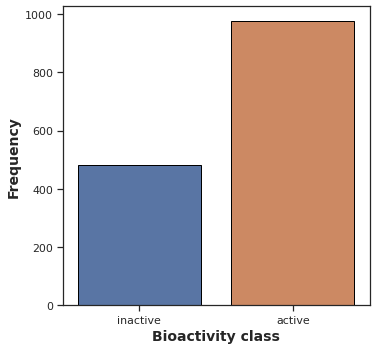

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

**Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


ValueError: ignored

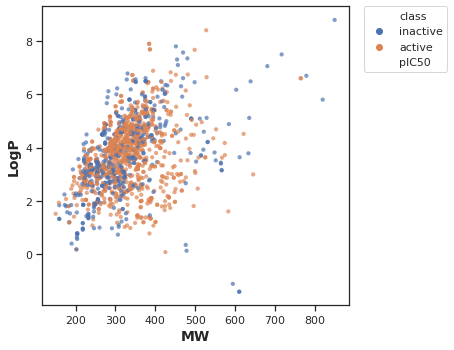

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

**Box plots**

pIC50 value

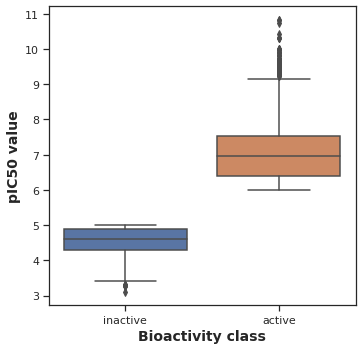

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis | Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.504027e-212,0.05,Different distribution (reject H0)


**MW**

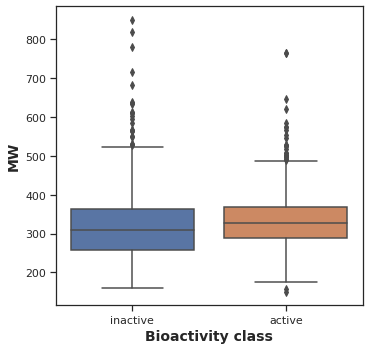

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,204285.5,0.000022,0.05,Different distribution (reject H0)


**LogP**

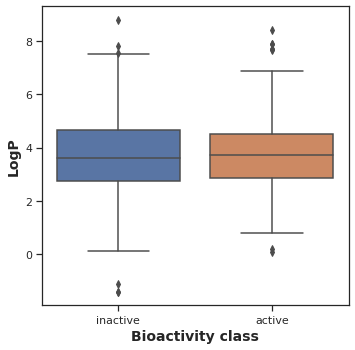

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**NumHDonors**


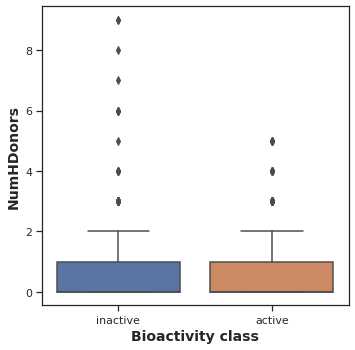

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Statistical analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,219956.0,0.011175,0.05,Different distribution (reject H0)


**NumHAcceptors**

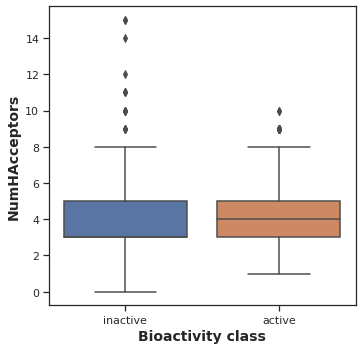

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,219458.0,0.016994,0.05,Different distribution (reject H0)


# Interpretation of Statistical Results

**Box Plots**

**pIC50 values**

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

# **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_pIC50.csv (deflated 12%)
  adding: plot_MW_vs_LogP.pdf (deflated 13%)
  adding: aromatase_02_bioactivity_data_preprocessed.csv (deflated 79%)
  adding: plot_MW.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: aromatase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: aromatase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: aromatase_01_bioactivity_data_raw.csv (deflated 90%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: aromatase_03_bioactivity_data_curated.csv (deflated 81%)
  adding: plot_NumHDonors.pdf (deflated 38%)


# **Bioinformatics Project - Computational Drug Discovery [Part 3] Descriptor Calculation and Dataset Preparation**



In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 3, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

**Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-06-11 10:40:51--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-06-11 10:40:51--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  75.1MB/s    in 0.3s    

2021-06-11 10:40:53 (75.1 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-06-11 10:40:53--  https://g

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

# **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [ ]:
df = pd.read_csv('aromatase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...,...
2046,2046,CHEMBL4564168,N#Cc1ccccc1CN(c1ccc([N+](=O)[O-])c(Br)c1)n1cnnc1,active,399.208,3.29038,0.0,7.0,7.230254
2047,2047,CHEMBL4568674,N#Cc1cccc(CN(c2ccc([N+](=O)[O-])c(Br)c2)n2cnnc...,active,399.208,3.29038,0.0,7.0,7.239728
2048,2048,CHEMBL4575939,O=[N+]([O-])c1cccc(CN(c2ccc([N+](=O)[O-])c(Br)...,active,419.195,3.32690,0.0,8.0,7.916497
2049,2049,CHEMBL4536893,O=[N+]([O-])c1ccc(N(Cc2ccccc2)n2cnnc2)cc1Br,active,374.198,3.41870,0.0,6.0,7.400444


In [ ]:
import pandas as pd

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021


In [ ]:
! cat molecule.smi | wc -l

2051


# **Calculate fingerprint descriptors**

**Calculate PaDEL descriptors**

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL341591 in molecule.smi (1/2051). 
Processing CHEMBL2111947 in molecule.smi (2/2051). 
Processing CHEMBL431859 in molecule.smi (3/2051). Average speed: 5.20 s/mol.
Processing CHEMBL113637 in molecule.smi (4/2051). Average speed: 2.71 s/mol.
Processing CHEMBL112021 in molecule.smi (5/2051). Average speed: 2.06 s/mol.
Processing CHEMBL324070 in molecule.smi (6/2051). Average speed: 1.57 s/mol.
Processing CHEMBL41761 in molecule.smi (7/2051). Average speed: 1.39 s/mol.
Processing CHEMBL111888 in molecule.smi (9/2051). Average speed: 1.10 s/mol.
Processing CHEMBL111868 in molecule.smi (8/2051). Average speed: 1.26 s/mol.
Processing CHEMBL112074 in molecule.smi (10/2051). Average speed: 1.04 s/mol.
Processing CHEMBL324326 in molecule.smi (11/2051). Average speed: 0.94 s/mol.
Processing CHEMBL353068 in molecule.smi (13/2051). Average speed: 0.84 s/mol.
Processing CHEMBL37321 in molecule.smi (12/2051). Average speed: 0.91 s/mol.
Processing CHEMBL41066 in molecule.smi (14/2051)

In [ ]:
! ls -l

total 31688
-rw-r--r-- 1 root root  1447194 Jun 11 09:18 aromatase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root   132090 Jun 11 09:18 aromatase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   151010 Jun 11 09:18 aromatase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   265340 Jun 11 10:36 aromatase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   186201 Jun 11 10:36 aromatase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root   198561 Jun 11 09:18 aromatase.zip
-rw-r--r-- 1 root root  3656704 Jun 11 10:48 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Jun 11 10:41 __MACOSX
-rw-r--r-- 1 root root      122 Jun 11 10:39 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      132 Jun 11 10:40 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      129 Jun 11 10:40 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      121 Jun 11 10:39 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root   118556 Jun 11 10:41 molecule.smi
drwxrwxr-x 4 root roo

**Preparing the X and Y Data Matrices**

X data matrix

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2111947,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL341591,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL431859,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL113637,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL112021,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,CHEMBL4564168,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2047,CHEMBL4568674,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2048,CHEMBL4575939,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2049,CHEMBL4547558,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2047,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2048,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2049,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Y variable**

Convert IC50 to pIC50